<a href="https://colab.research.google.com/github/panditadata/Panditadata_DSPortfolio/blob/gh-pages/World_Bank_Education_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

#World Bank Education Data Analysis

##Intro to Python


In [81]:
print("World Bank")
print(5)
print(5.5)
print(True)


World Bank
5
5.5
True


##Loading the Data


Data taken from [World Bank Repository](https://https://data.worldbank.org/topic/education?cid=EXT_TWBN_D_EXT)
<p>Download data <p>
<p>Upload data<p>
Read data into pandas

In [82]:
import pandas as pd

main_data = pd.read_csv("/content/API_4_DS2_en_csv_v2_1741864.csv", skiprows= 4)
main_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,53.669919,54.056784,54.383281,54.710292,55.119933,55.631102,56.075544,56.703126,57.414449,58.086708,58.679715,59.55249,60.248997,60.890062,61.639241,62.566563,63.078929,63.850512,64.825383,65.810270,66.635051,67.185101,67.578450,67.804376,67.945127,68.154412,67.755890,67.567480,67.614074,67.749705,67.796747,68.523104,69.021763,69.298246,69.471969,69.667845,69.450721,69.326281,69.279421,69.261277,69.240421,69.323344,69.421636,69.554820,69.734750,69.935320,69.857389,69.690384,69.445924,69.159726,68.838092,68.885601,68.986934,69.108851,69.181105,69.159774,69.137615,68.946339,68.646606,68.321199,NaN,NaN
1,Aruba,ABW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.847190,43.358346,42.925745,42.488756,41.950133,41.290098,40.689595,39.900095,39.011064,38.134727,37.316086,36.08681,35.015040,33.989011,32.869085,31.577559,30.878421,29.907564,28.734007,27.542514,26.514244,25.829247,25.314207,25.001206,24.785155,24.527973,24.862716,24.976954,24.853059,24.641172,24.547459,24.084677,23.804499,23.685590,23.598435,23.420148,23.562500,23.583106,23.490725,23.348127,23.179202,22.918685,22.622958,22.277539,21.882374,21.473343,21.223992,21.080398,21.005742,20.949189,20.873619,20.530937,20.092629,19.593055,19.111724,18.703098,18.257495,17.980183,17.802447,17.620445,NaN,NaN
2,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
import pandas as pd

country_data=pd.read_csv("/content/Metadata_Country_API_4_DS2_en_csv_v2_1741864.csv")
country_data.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN


##Cleaning the Data

Sort and merge 2 datasets
<p>Creating dataset<p>

In [84]:
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [85]:
main_data['Indicator Name'].unique()

array(['Population ages 15-64 (% of total population)',
       'Population ages 0-14 (% of total population)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
       'Unemployment, female (% of female labor force) (modeled ILO estimate)',
       'Labor force, total',
       'Labor force, female (% of total labor force)',
       'Probability of dying among youth ages 20-24 years (per 1,000)',
       'Probability of dying among adolescents ages 15-19 years (per 1,000)',
       'Probability of dying among adolescents ages 10-14 years (per 1,000)',
       'Probability of dying among children ages 5-9 years (per 1,000)',
       'Number of deaths ages 20-24 years',
       'Number of deaths ages 15-19 years',
       'Number of deaths ages 10-14 years',
       'Number of deaths ages 5-9 years',
       'Government expenditure on education, total (% of GDP)',
       'Government expenditure o

== is a comparison operator and check each column that has the required indicator 

In [86]:
main_data_unem=main_data[main_data['Indicator Name']=='Unemployment, female (% of female labor force) (modeled ILO estimate)']
main_data_unem.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
4,Aruba,ABW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Afghanistan,AFG,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.226,14.348000,14.391,14.515000,14.803000,14.505,14.699000,14.710,14.794,14.733000,14.702000,15.036,14.859,14.877000,14.910000,14.431000,14.724,14.154,14.911,14.815,14.781,14.820,14.680,14.505,14.427,14.314,14.090,13.906,14.004,14.062,NaN
328,Angola,AGO,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.637,2.723000,2.695,2.882000,2.948000,2.994,2.876000,2.967,2.932,2.798000,2.811000,2.899,2.833,2.882000,2.852000,2.746000,2.723,2.710,2.845,10.922,7.718,7.788,7.772,7.719,7.681,7.563,7.467,7.327,6.942,6.631,NaN
490,Albania,ALB,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.804,16.247999,16.711,16.749001,16.766001,16.739,16.434999,16.829,16.916,16.898001,16.992001,17.063,17.104,17.011999,16.919001,16.643999,16.399,13.752,15.734,15.881,13.762,11.467,13.345,15.153,17.098,14.573,12.563,11.229,11.604,12.190,NaN
652,Andorra,AND,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
main_data_unem= main_data_unem[['Country Name', 'Country Code','1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
main_data_unem.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
4,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Afghanistan,AFG,14.226,14.348000,14.391,14.515000,14.803000,14.505,14.699000,14.710,14.794,14.733000,14.702000,15.036,14.859,14.877000,14.910000,14.431000,14.724,14.154,14.911,14.815,14.781,14.820,14.680,14.505,14.427,14.314,14.090,13.906,14.004,14.062
328,Angola,AGO,2.637,2.723000,2.695,2.882000,2.948000,2.994,2.876000,2.967,2.932,2.798000,2.811000,2.899,2.833,2.882000,2.852000,2.746000,2.723,2.710,2.845,10.922,7.718,7.788,7.772,7.719,7.681,7.563,7.467,7.327,6.942,6.631
490,Albania,ALB,15.804,16.247999,16.711,16.749001,16.766001,16.739,16.434999,16.829,16.916,16.898001,16.992001,17.063,17.104,17.011999,16.919001,16.643999,16.399,13.752,15.734,15.881,13.762,11.467,13.345,15.153,17.098,14.573,12.563,11.229,11.604,12.190
652,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
country_data.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')

In [89]:
country_data.columns
country_data=country_data[['Country Code', 'Region', 'IncomeGroup']]
country_data.head()


,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income


In [90]:
merged_data = pd.merge(main_data_unem, country_data, on='Country Code')
merged_data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Afghanistan,AFG,14.226,14.348000,14.391,14.515000,14.803000,14.505,14.699000,14.710,14.794,14.733000,14.702000,15.036,14.859,14.877000,14.910000,14.431000,14.724,14.154,14.911,14.815,14.781,14.820,14.680,14.505,14.427,14.314,14.090,13.906,14.004,14.062,South Asia,Low income
2,Angola,AGO,2.637,2.723000,2.695,2.882000,2.948000,2.994,2.876000,2.967,2.932,2.798000,2.811000,2.899,2.833,2.882000,2.852000,2.746000,2.723,2.710,2.845,10.922,7.718,7.788,7.772,7.719,7.681,7.563,7.467,7.327,6.942,6.631,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,15.804,16.247999,16.711,16.749001,16.766001,16.739,16.434999,16.829,16.916,16.898001,16.992001,17.063,17.104,17.011999,16.919001,16.643999,16.399,13.752,15.734,15.881,13.762,11.467,13.345,15.153,17.098,14.573,12.563,11.229,11.604,12.190,Europe & Central Asia,Upper middle income
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income


In [91]:
merged_data.columns

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Region',
       'IncomeGroup'],
      dtype='object')

In [92]:
merged_data=merged_data[['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Region',
       'IncomeGroup']]
merged_data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Afghanistan,AFG,14.226,14.348000,14.391,14.515000,14.803000,14.505,14.699000,14.710,14.794,14.733000,14.702000,15.036,14.859,14.877000,14.910000,14.431000,14.724,14.154,14.911,14.815,14.781,14.820,14.680,14.505,14.427,14.314,14.090,13.906,14.004,14.062,South Asia,Low income
2,Angola,AGO,2.637,2.723000,2.695,2.882000,2.948000,2.994,2.876000,2.967,2.932,2.798000,2.811000,2.899,2.833,2.882000,2.852000,2.746000,2.723,2.710,2.845,10.922,7.718,7.788,7.772,7.719,7.681,7.563,7.467,7.327,6.942,6.631,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,15.804,16.247999,16.711,16.749001,16.766001,16.739,16.434999,16.829,16.916,16.898001,16.992001,17.063,17.104,17.011999,16.919001,16.643999,16.399,13.752,15.734,15.881,13.762,11.467,13.345,15.153,17.098,14.573,12.563,11.229,11.604,12.190,Europe & Central Asia,Upper middle income
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income


#Exploratory Data Analysis
###Removing all the NAN


In [93]:

merged_data.isna()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
0,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
259,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
260,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
261,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [94]:
merged_data.isna().sum()


Country Name     0
Country Code     0
1991            30
1992            30
1993            30
1994            30
1995            30
1996            30
1997            30
1998            30
1999            30
2000            30
2001            30
2002            30
2003            30
2004            30
2005            30
2006            30
2007            30
2008            30
2009            30
2010            30
2011            30
2012            30
2013            30
2014            30
2015            30
2016            30
2017            30
2018            30
2019            30
2020            30
Region          46
IncomeGroup     46
dtype: int64

In [95]:
merged_data.isna().shape

(263, 34)

In [96]:
merged_data_clean = merged_data.dropna()
merged_data_clean

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
1,Afghanistan,AFG,14.226000,14.348000,14.391000,14.515000,14.803000,14.505000,14.699000,14.710,14.794000,14.733000,14.702000,15.036000,14.859,14.877000,14.910000,14.431000,14.724000,14.154000,14.911000,14.815000,14.781000,14.820,14.680000,14.505,14.427000,14.314000,14.090000,13.906000,14.004000,14.062000,South Asia,Low income
2,Angola,AGO,2.637000,2.723000,2.695000,2.882000,2.948000,2.994000,2.876000,2.967,2.932000,2.798000,2.811000,2.899000,2.833,2.882000,2.852000,2.746000,2.723000,2.710000,2.845000,10.922000,7.718000,7.788,7.772000,7.719,7.681000,7.563000,7.467000,7.327000,6.942000,6.631000,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,15.804000,16.247999,16.711000,16.749001,16.766001,16.739000,16.434999,16.829,16.916000,16.898001,16.992001,17.063000,17.104,17.011999,16.919001,16.643999,16.399000,13.752000,15.734000,15.881000,13.762000,11.467,13.345000,15.153,17.098000,14.573000,12.563000,11.229000,11.604000,12.190000,Europe & Central Asia,Upper middle income
6,United Arab Emirates,ARE,2.431000,2.115000,2.259000,2.259000,2.359000,2.441000,2.501000,2.513,2.529000,2.718000,3.355000,3.978000,5.107,6.390000,7.221000,6.682000,5.829000,5.419000,5.843000,5.883000,5.983000,5.956,5.851000,5.214,4.703000,4.200000,7.136000,6.187000,6.046000,6.042000,Middle East & North Africa,High income
7,Argentina,ARG,5.747000,6.711000,12.558000,13.927000,22.195999,19.190001,17.631001,14.029,15.147000,16.344999,17.191999,18.830000,17.549,15.789000,13.561000,12.392000,10.544000,9.720000,9.855000,9.196000,8.496000,8.811,8.484000,8.383,8.851000,9.118000,9.464000,10.538000,10.922000,11.487000,Latin America & Caribbean,Upper middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Samoa,WSM,2.667000,3.014000,3.278000,3.656000,3.952000,4.296000,4.505000,4.889,5.232000,5.700000,6.095000,6.167000,6.235,6.207000,6.279000,6.088000,6.026000,6.120000,6.236000,6.508000,6.691000,10.345,10.355000,10.350,10.265000,10.293000,9.970000,9.806000,9.837000,9.797000,East Asia & Pacific,Upper middle income
259,"Yemen, Rep.",YEM,3.728000,3.832000,3.833000,3.877000,4.561000,5.341000,6.207000,7.146,8.157000,8.936000,9.696000,10.629000,11.572,12.460000,13.378000,14.102000,15.009000,16.077999,17.962999,19.591999,20.389999,22.830,24.614000,26.115,25.295000,25.466999,25.469000,25.306999,24.879999,24.462000,Middle East & North Africa,Low income
260,South Africa,ZAF,35.853001,35.848000,36.375999,36.492001,36.417000,36.494999,36.243000,36.069,36.351002,36.330002,36.787998,41.546001,39.480,36.366001,36.550999,35.971001,33.179001,25.836000,25.590000,27.032000,27.247000,27.087,26.547001,27.045,27.542999,29.006001,29.297001,29.059999,30.334999,30.809999,Sub-Saharan Africa,Upper middle income
261,Zambia,ZMB,22.099001,21.347000,20.601000,18.608000,17.459999,15.826000,13.489000,11.494,11.612000,11.432000,12.078000,12.867000,13.739,14.416000,15.054000,12.345000,9.842000,7.705000,10.413000,13.275000,10.429000,8.007,8.864000,9.731,10.687000,11.629000,12.570000,12.448000,12.237000,11.981000,Sub-Saharan Africa,Lower middle income


In [97]:
grouped_data_income = merged_data_clean.groupby(['IncomeGroup']).describe()
grouped_data_income = merged_data_clean.groupby(['IncomeGroup']).mean()
grouped_data_income 

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
IncomeGroup,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High income,7.736467,8.250783,9.243850,9.437617,9.237233,9.212950,8.843950,8.693183,8.703783,8.479150,8.252700,8.419200,8.672367,8.563100,8.345683,7.703300,7.011633,6.799433,8.279067,8.769983,8.888267,9.132533,9.244683,8.827083,8.370100,7.900950,7.301283,6.753733,6.569350,6.594800
Low income,5.191034,5.122586,5.241103,5.521621,5.722138,5.862035,5.939793,6.142310,6.236034,6.476931,6.796276,6.910207,6.998379,7.046828,7.092172,7.077345,7.154931,7.056069,7.421069,7.645621,7.609897,7.646276,7.719931,7.709862,7.734690,7.701448,7.599138,7.491828,7.458897,7.440862
Lower middle income,7.770750,7.832417,8.115313,8.255917,8.423167,8.522042,8.436583,8.552500,8.596146,8.522167,8.632187,8.800479,8.815729,8.629063,8.552938,8.074896,7.795771,7.745271,8.212021,8.366792,8.326208,8.061479,8.041271,7.941438,8.267479,8.405146,8.481042,8.283375,8.333917,8.284333
Upper middle income,11.855680,11.943880,12.369380,12.909100,13.475140,13.965980,14.108920,14.097900,14.203700,13.907960,13.776640,14.130820,13.996420,13.734020,13.419940,12.613340,11.910920,11.348980,12.007120,12.239020,12.157240,12.124720,12.233620,12.294740,12.246720,12.158600,11.795040,11.403020,11.610500,11.690940


In [98]:
transpose_income_group = grouped_data_income.transpose()
transpose_income_group

IncomeGroup,High income,Low income,Lower middle income,Upper middle income
1991,7.736467,5.191034,7.770750,11.85568
1992,8.250783,5.122586,7.832417,11.94388
1993,9.243850,5.241103,8.115313,12.36938
1994,9.437617,5.521621,8.255917,12.90910
1995,9.237233,5.722138,8.423167,13.47514
1996,9.212950,5.862035,8.522042,13.96598
1997,8.843950,5.939793,8.436583,14.10892
1998,8.693183,6.142310,8.552500,14.09790
1999,8.703783,6.236034,8.596146,14.20370
2000,8.479150,6.476931,8.522167,13.90796


In [99]:
import matplotlib.pyplot as plt
%matplotlib inline


Text(0, 0.5, '% UnEmployment')

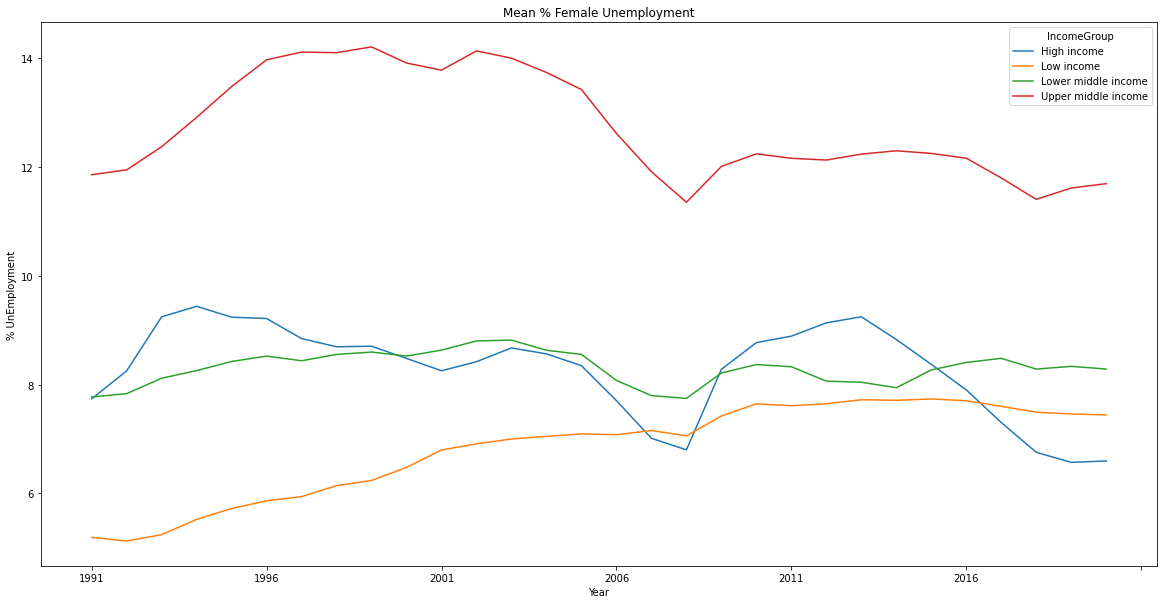

In [100]:
transpose_income_group.plot(figsize=(20,10))
plt.title("Mean % Female Unemployment")
plt.xlabel("Year")
plt.ylabel("% UnEmployment")

Text(0, 0.5, '% UnEmployment')

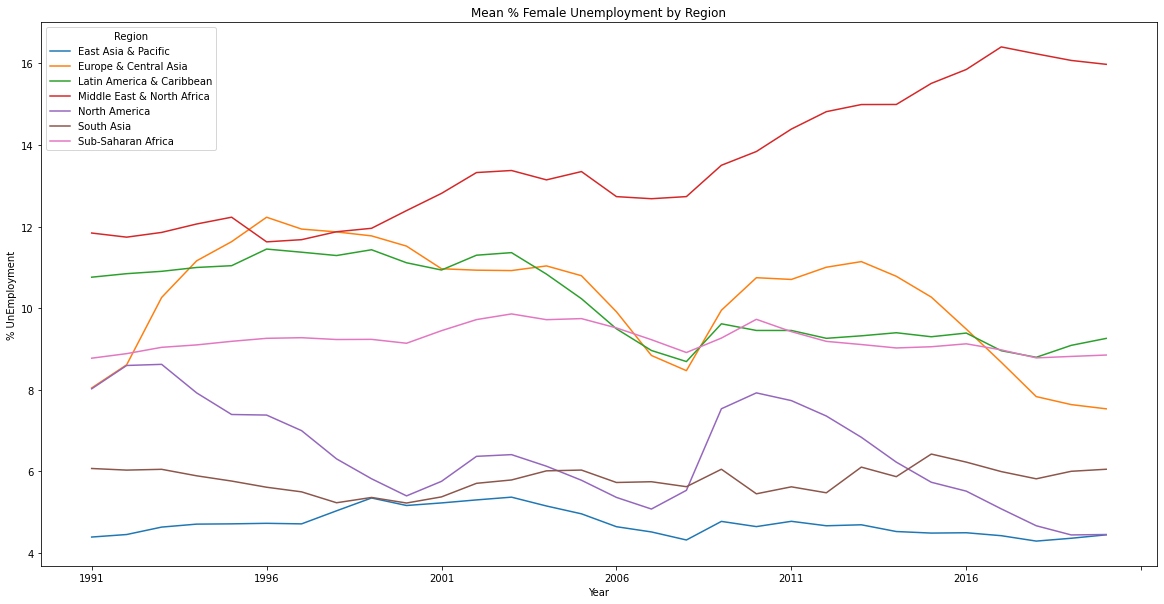

In [101]:
grouped_data_region = merged_data_clean.groupby(['Region']).describe()
grouped_data_region = merged_data_clean.groupby(['Region']).mean()
transposed_region = grouped_data_region.transpose()
transposed_region.plot(figsize=(20,10))
plt.title('Mean % Female Unemployment by Region')
plt.xlabel('Year')
plt.ylabel("% UnEmployment")

##ANOVA

In [102]:
import scipy.stats as stats

In [103]:
merged_data_clean.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
1,Afghanistan,AFG,14.226,14.348000,14.391,14.515000,14.803000,14.505000,14.699000,14.710,14.794,14.733000,14.702000,15.036,14.859,14.877000,14.910000,14.431000,14.724,14.154,14.911,14.815,14.781,14.820,14.680,14.505,14.427,14.314,14.090,13.906,14.004,14.062,South Asia,Low income
2,Angola,AGO,2.637,2.723000,2.695,2.882000,2.948000,2.994000,2.876000,2.967,2.932,2.798000,2.811000,2.899,2.833,2.882000,2.852000,2.746000,2.723,2.710,2.845,10.922,7.718,7.788,7.772,7.719,7.681,7.563,7.467,7.327,6.942,6.631,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,15.804,16.247999,16.711,16.749001,16.766001,16.739000,16.434999,16.829,16.916,16.898001,16.992001,17.063,17.104,17.011999,16.919001,16.643999,16.399,13.752,15.734,15.881,13.762,11.467,13.345,15.153,17.098,14.573,12.563,11.229,11.604,12.190,Europe & Central Asia,Upper middle income
6,United Arab Emirates,ARE,2.431,2.115000,2.259,2.259000,2.359000,2.441000,2.501000,2.513,2.529,2.718000,3.355000,3.978,5.107,6.390000,7.221000,6.682000,5.829,5.419,5.843,5.883,5.983,5.956,5.851,5.214,4.703,4.200,7.136,6.187,6.046,6.042,Middle East & North Africa,High income
7,Argentina,ARG,5.747,6.711000,12.558,13.927000,22.195999,19.190001,17.631001,14.029,15.147,16.344999,17.191999,18.830,17.549,15.789000,13.561000,12.392000,10.544,9.720,9.855,9.196,8.496,8.811,8.484,8.383,8.851,9.118,9.464,10.538,10.922,11.487,Latin America & Caribbean,Upper middle income


In [104]:
income_groups = merged_data_clean['IncomeGroup'].unique()
len(income_groups)

4

In [105]:
income_groups

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

In [106]:
income_group_data=[]
for i in range (len(income_groups)):
  income_group_data.append(merged_data_clean['2019'][merged_data_clean['IncomeGroup']==income_groups[i]])

In [107]:
income_group_data

[1      14.004000
 14      1.009000
 17      9.223000
 32      3.565000
 41      3.404000
 67      4.953000
 70      2.756000
 83      3.316000
 84     12.237000
 85      2.210000
 98     16.693001
 128     2.224000
 148     1.846000
 155     7.954000
 162     3.453000
 165     6.617000
 170     0.360000
 190     2.331000
 200     1.070000
 203    27.768999
 207     3.628000
 210    11.079000
 213    13.406000
 224    20.837000
 226     1.706000
 229     1.547000
 231     9.935000
 244     2.296000
 259    24.879999
 Name: 2019, dtype: float64, 2       6.942000
 16      2.336000
 18      6.204000
 26      3.809000
 30      3.200000
 39      3.772000
 40      3.872000
 42     10.105000
 44      4.702000
 45     11.491000
 54     10.402000
 58     21.080000
 65     22.150000
 81      4.464000
 95      7.003000
 107     5.233000
 118     2.800000
 119     7.467000
 120     0.824000
 126     0.569000
 135     6.687000
 138    27.118000
 145    10.415000
 147     4.155000
 157     2.074000


In [108]:
statistic, pvalue = stats.f_oneway(income_group_data[0],
                                   income_group_data[1],
                                   income_group_data[2],
                                   income_group_data[3])
print("statistic: %s pvalue %s" %(statistic,pvalue))

statistic: 5.052886221006664 pvalue 0.0021894356280740147


In [109]:
regions = merged_data_clean['Region'].unique()
print(regions)


regions_data=[]
for i in range (len(regions)):
  regions_data.append(merged_data_clean['2019'][merged_data_clean['Region']==regions[i]])



statistic, pvalue = stats.f_oneway(regions_data[0],
                                   regions_data[1],
                                   regions_data[2],
                                   regions_data[3],regions_data[4],regions_data[4],
                                   regions_data[5],regions_data[6])
print("statistic: %s pvalue %s" %(statistic,pvalue))


['South Asia' 'Sub-Saharan Africa' 'Europe & Central Asia'
 'Middle East & North Africa' 'Latin America & Caribbean'
 'East Asia & Pacific' 'North America']
statistic: 6.442859633560542 pvalue 6.990689088978872e-07


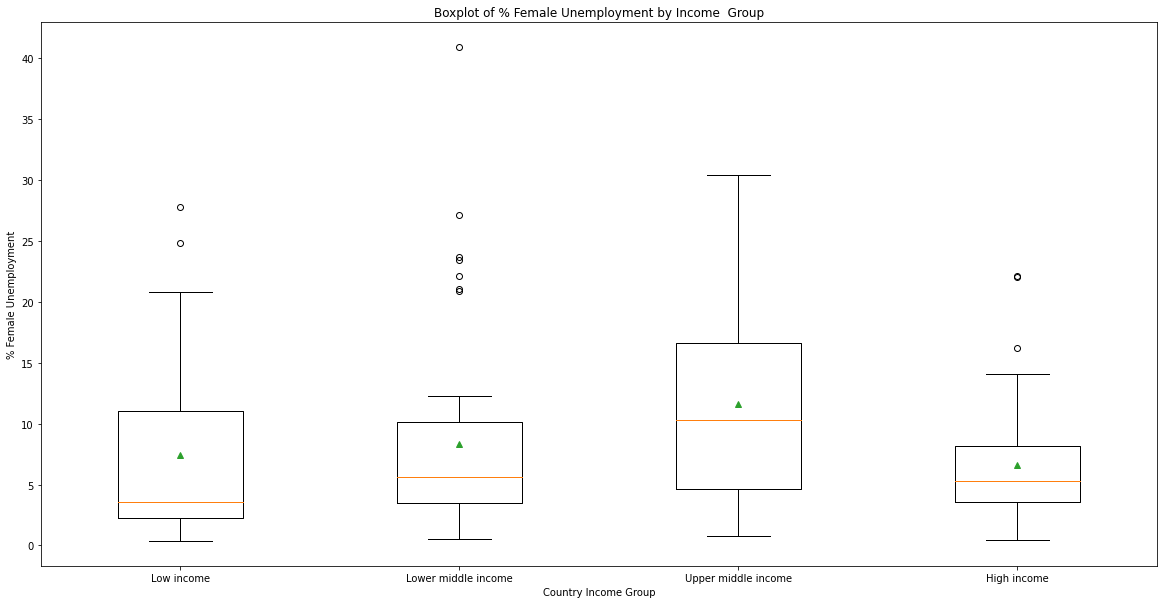

In [110]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_title("Boxplot of % Female Unemployment by Income  Group")
ax.set
ax.boxplot(income_group_data, labels = income_groups, showmeans =True)
plt.xlabel("Country Income Group")
plt.ylabel("% Female Unemployment")
plt.show()

###Creating a Worldmap

In [111]:
main_data_m=main_data.melt(id_vars=['Country Code', 'Indicator Name'],value_vars=['1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
main_data_m.head()

main_data_m= main_data_m.rename(columns={'variable': 'Year'})

main_data_m.head()
main_data_m_clean=main_data_m.dropna()
main_data_m_clean.head()

,Country Code,Indicator Name,Year,value
0,ABW,Population ages 15-64 (% of total population),1991,68.523104
1,ABW,Population ages 0-14 (% of total population),1991,24.084677
78,ABW,"Secondary education, duration (years)",1991,5.000000
82,ABW,"Educational attainment, at least completed pos...",1991,7.186510
83,ABW,"Educational attainment, at least completed pos...",1991,9.047520


In [112]:
import pandas as pd
import folium
import csv
import json


In [114]:
stage = main_data_m_clean
stage



,Country Code,Indicator Name,Year,value
0,ABW,Population ages 15-64 (% of total population),1991,68.523104
1,ABW,Population ages 0-14 (% of total population),1991,24.084677
78,ABW,"Secondary education, duration (years)",1991,5.000000
82,ABW,"Educational attainment, at least completed pos...",1991,7.186510
83,ABW,"Educational attainment, at least completed pos...",1991,9.047520
...,...,...,...,...
1282884,ZWE,"Labor force, female (% of total labor force)",2020,50.859818
1282956,ZWE,"Secondary education, duration (years)",2020,6.000000
1282969,ZWE,Lower secondary school starting age (years),2020,13.000000
1283012,ZWE,"Primary education, duration (years)",2020,7.000000


In [115]:
main_data_m_clean_year=main_data_m_clean[main_data_m_clean['Year']=='2019']
main_data_m_clean_year_ind=main_data_m_clean_year[main_data_m_clean_year['Indicator Name']=='Unemployment, female (% of female labor force) (modeled ILO estimate)']
main_data_m_clean_year_ind

,Country Code,Indicator Name,Year,value
1197670,AFG,"Unemployment, female (% of female labor force)...",2019,14.004000
1197832,AGO,"Unemployment, female (% of female labor force)...",2019,6.942000
1197994,ALB,"Unemployment, female (% of female labor force)...",2019,11.604000
1198318,ARB,"Unemployment, female (% of female labor force)...",2019,19.954200
1198480,ARE,"Unemployment, female (% of female labor force)...",2019,6.046000
...,...,...,...,...
1239304,WSM,"Unemployment, female (% of female labor force)...",2019,9.837000
1239628,YEM,"Unemployment, female (% of female labor force)...",2019,24.879999
1239790,ZAF,"Unemployment, female (% of female labor force)...",2019,30.334999
1239952,ZMB,"Unemployment, female (% of female labor force)...",2019,12.237000


In [126]:
data_to_plot = main_data_m_clean_year_ind[['Country Code','value']]
data_to_plot['Country Code'].unique()

array(['AFG', 'AGO', 'ALB', 'ARB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT',
       'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS',
       'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA',
       'CAF', 'CAN', 'CEB', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR',
       'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CSS', 'CUB', 'CYP',
       'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR', 'EAS',
       'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST', 'ETH',
       'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA',
       'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GTM', 'GUM', 'GUY', 'HIC',
       'HKG', 'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IBD', 'IBT', 'IDA',
       'IDB', 'IDN', 'IDX', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR',
       'KWT', 'LAC', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LDC',
       'LIC', 'LKA', 'LMC', 'LMY', 'LSO', 'LTE', 'LTU', 'LUX', 'LVA',
       'MAC', 'MAR',

In [147]:
data_to_plot

,Country Code,value
1197670,AFG,14.004000
1197832,AGO,6.942000
1197994,ALB,11.604000
1198318,ARB,19.954200
1198480,ARE,6.046000
...,...,...
1239304,WSM,9.837000
1239628,YEM,24.879999
1239790,ZAF,30.334999
1239952,ZMB,12.237000


In [117]:
hist_indicator = main_data_m_clean_year_ind.iloc[0]['Indicator Name']
hist_indicator

'Unemployment, female (% of female labor force) (modeled ILO estimate)'

In [133]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [134]:
wc=r'world_countries.json'

In [144]:
world = folium.Map(location=[0, 0], zoom_start=2)


In [145]:
 # choropleth maps bind Pandas Data Frames and json geometries.
world.choropleth(geo_data =wc ,
                data = data_to_plot,
                columns = 
['Country Code', 'value'],

key_on='feature.id',
fill_color = 'YlOrRd',
                  fill_opacity =0.8 ,
                  line_opacity = 0.1,
legend_name ='%Female Unemployment')
world

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
